In [383]:
import numpy as np 
import pandas as pd
import datetime # para convertir a dia de la semana
import calendar # idem

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# https://github.com/idontdomath/datos-exploratory-data-analysis/blob/master/class01/03-intro-pandas-flight-delays.ipynb

In [384]:
# estatus = pd.read_csv('status.csv', sep='\t', iterator=True, chunksize=1000)
#cada vez que se corre son los proximos 500
# estatus.get_chunk(500)

In [385]:
trips = pd.read_csv('trip.csv', low_memory=False)
#Se convierte los dates a datetime64[ns].
trips['start_date'] = pd.to_datetime(trips['start_date'])
trips['end_date'] = pd.to_datetime(trips['end_date'])

In [386]:
#Se agrega una nueva columna date que coincide con weather.
trips['date'] = trips['start_date'].apply(lambda x: x.date())
#Se convierte date a datetime64[ns].
trips['date'] = pd.to_datetime(trips['date'])

In [387]:
# chequeo tipos
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
date                  datetime64[ns]
dtype: object

In [388]:
# ejemplo del uso de datetime con día actual
dia_actual = datetime.datetime.today()
dia_actual

datetime.datetime(2017, 4, 14, 2, 38, 2, 827511)

In [389]:
# lo paso a dia de la semana
dia_actual.weekday()

4

In [390]:
# mejor en palabras que en números
calendar.day_name[dia_actual.weekday()]

'Friday'

In [391]:
# función para convertir fecha a día de la semana.
def fecha_a_dia(fecha):
    return calendar.day_name[fecha.weekday()]

In [392]:
#Se crean columnas con los dias de la semana.
trips['start_day_of_week'] = trips['start_date'].map(fecha_a_dia)
trips['end_day_of_week'] = trips['end_date'].map(fecha_a_dia)

In [393]:
trips['horario_inicial'] = trips['start_date'].dt.time
trips['horario_inicial_float'] = trips['start_date'].dt.hour + trips['start_date'].dt.minute / 100
#por el momento dejo ambos por si se necesitan

In [394]:
trips['horario_final'] = trips['end_date'].dt.time
trips['horario_final_float'] = trips['end_date'].dt.hour + trips['end_date'].dt.minute / 100
#idem

In [395]:
trips['duracion_viaje'] = trips['end_date'] - trips['start_date']
# trips['duracion_viaje'] = pd.to_datetime(trips['duracion_viaje'])
# no es necesario pero lo dejo por las dudas, puede servir

In [396]:
# vista final de cómo quedó el dataframe
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,Thursday,Thursday,14:13:00,14.13,14:14:00,14.14,00:01:00
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,Thursday,Thursday,14:42:00,14.42,14:43:00,14.43,00:01:00
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,Thursday,Thursday,10:16:00,10.16,10:17:00,10.17,00:01:00
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,Thursday,Thursday,11:29:00,11.29,11:30:00,11.30,00:01:00
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,Thursday,Thursday,12:02:00,12.02,12:04:00,12.04,00:02:00


## ¿Viajes de menos de 3 minutos con misma estación de inicio y fin?
Una primera impresión es que hay viajes "ruidosos": duran menos de 3 minutos y las estaciones de inicio y fin
son las mismas. Esto nos dice que el usuario no tomó el viaje por algún motivo. Se van a filtrar esos viajes.

In [397]:
viajes_no_tomados = trips[(trips['duracion_viaje'] <= '00:03:00') & (trips['start_station_id'] == trips['end_station_id'])]
trips = trips[-((trips['duracion_viaje'] <= '00:03:00') & (trips['start_station_id'] == trips['end_station_id']))]
# hay que hacer trips - viajes_no_tomados para que quede lindo pero requiere un comando (isin o algo asi). 
# no me salio bien asi que a lo ultimo lo modifico

In [398]:
viajes_no_tomados.id.count()

2601

In [399]:
viajes_no_tomados.bike_id.value_counts().count()
# cantidad distintas de bicicletas dentro de esos 2601 viajes. Crei que iba a aportar información 
# para lo de las biciletas descompuestas pero no creo que ayude. Hay que analizar si es que varios de esos viajes
# con el mismo id de bicicleta se tomaron bastante pegados entonces si claramente las devolvieron porq estaban rotas

598

Se filtraron unos 2600 viajes. // acá iría la conclusión acerca de posibles bicicletas descompuestas

### Ahora analicemos lo opuesto, que tan largo puede ser un viaje.

In [400]:
trips[(trips['duracion_viaje'] > "08:00:00")]

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
743,4663,52698,2013-08-29 15:34:00,Mountain View City Hall,27,2013-08-30 06:12:00,Park at Olive,38,150,Subscriber,94301,2013-08-29,Thursday,Friday,15:34:00,15.34,06:12:00,6.12,0 days 14:38:00
744,4532,84990,2013-08-29 13:43:00,Market at 4th,76,2013-08-30 13:19:00,Harry Bridges Plaza (Ferry Building),50,460,Customer,94118,2013-08-29,Thursday,Friday,13:43:00,13.43,13:19:00,13.19,0 days 23:36:00
745,4521,85385,2013-08-29 13:37:00,Market at 4th,76,2013-08-30 13:20:00,Harry Bridges Plaza (Ferry Building),50,390,Customer,94118,2013-08-29,Thursday,Friday,13:37:00,13.37,13:20:00,13.20,0 days 23:43:00
746,5069,86102,2013-08-29 21:41:00,Embarcadero at Folsom,51,2013-08-30 21:37:00,Davis at Jackson,42,269,Customer,94111,2013-08-29,Thursday,Friday,21:41:00,21.41,21:37:00,21.37,0 days 23:56:00
747,4505,97713,2013-08-29 13:30:00,Mountain View Caltrain Station,28,2013-08-30 16:38:00,Mountain View City Hall,27,141,Subscriber,94039,2013-08-29,Thursday,Friday,13:30:00,13.30,16:38:00,16.38,1 days 03:08:00
1454,5120,33088,2013-08-30 06:37:00,Steuart at Market,74,2013-08-30 15:49:00,Steuart at Market,74,277,Customer,94510,2013-08-30,Friday,Friday,06:37:00,6.37,15:49:00,15.49,0 days 09:12:00
1455,5113,34449,2013-08-30 02:16:00,Japantown,9,2013-08-30 11:50:00,Japantown,9,52,Customer,95148,2013-08-30,Friday,Friday,02:16:00,2.16,11:50:00,11.50,0 days 09:34:00
1456,5182,36255,2013-08-30 08:42:00,Harry Bridges Plaza (Ferry Building),50,2013-08-30 18:47:00,Harry Bridges Plaza (Ferry Building),50,350,Customer,94707,2013-08-30,Friday,Friday,08:42:00,8.42,18:47:00,18.47,0 days 10:05:00
1457,6412,70731,2013-08-30 20:04:00,Golden Gate at Polk,59,2013-08-31 15:43:00,Powell at Post (Union Square),71,381,Customer,94028,2013-08-30,Friday,Saturday,20:04:00,20.04,15:43:00,15.43,0 days 19:39:00
1458,6178,70982,2013-08-30 16:59:00,Temporary Transbay Terminal (Howard at Beale),55,2013-08-31 12:42:00,2nd at South Park,64,348,Customer,94107,2013-08-30,Friday,Saturday,16:59:00,16.59,12:42:00,12.42,0 days 19:43:00


## ¿Viajes de más de 8 horas de duración?
Se pueden esperar viajes muy largos de a lo sumo 8 horas de alguien que decidió recorrer varios puntos de la ciudad y aparte en el medio ir parando, pero ya cuando se excede esto hasta casos que incluso superan un día de uso creemos que hubo datos mal cargados o algún otro problema como la incorrecta devolución de la bicicleta. Por eso se van a filtrar esos viajes.

In [401]:
viajes_larguisimos = trips[trips['duracion_viaje'] > "08:00:00"]
trips = trips[-(trips['duracion_viaje'] > "08:00:00")]
# hay que hacer trips - viajes_larguisimos para que quede lindo pero requiere un comando (isin o algo asi). 
# no me salio bien asi que a lo ultimo lo modifico

In [402]:
viajes_larguisimos.id.count()

1884

Se filtraron unos 1884 viajes.

In [403]:
# no es necesario pero lo dejo por las dudas, puede servir
# trips[-((trips['duracion_viaje'] < '1970-01-01 00:10:00') & (trips['start_station_id'] == trips['end_station_id']))]

In [404]:
# ahora los datos quedan más limpios
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,Thursday,Thursday,12:02:00,12.02,12:04:00,12.04,00:02:00
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,2013-08-29,Thursday,Thursday,13:25:00,13.25,13:27:00,13.27,00:02:00
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,2013-08-29,Thursday,Thursday,11:33:00,11.33,11:35:00,11.35,00:02:00
10,4549,125,2013-08-29 13:52:00,Spear at Folsom,49,2013-08-29 13:55:00,Embarcadero at Bryant,54,368,Subscriber,94109,2013-08-29,Thursday,Thursday,13:52:00,13.52,13:55:00,13.55,00:03:00
11,4498,126,2013-08-29 13:23:00,San Pedro Square,6,2013-08-29 13:25:00,Santa Clara at Almaden,4,26,Subscriber,95112,2013-08-29,Thursday,Thursday,13:23:00,13.23,13:25:00,13.25,00:02:00


# 1) Análisis de viajes según día y horario
### En estos primeros plots se analizará la relación general entre los viajes y el día/horario de la semana.

### ¿El servicio se usa más en la semana o los fines de semana?

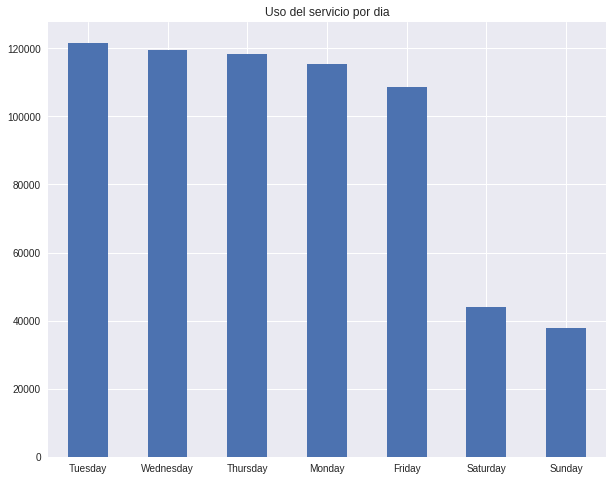

In [405]:
trips['start_day_of_week'].value_counts().plot(kind='bar', rot=0, figsize=(10,8));
plt.title('Uso del servicio por dia');

In [406]:
dias = trips[['start_day_of_week']]
dias_semana = dias[-(dias['start_day_of_week'] == "Saturday")]
dias_semana = dias[-(dias['start_day_of_week'] == "Sunday")]
dias_finde = dias[(dias['start_day_of_week'] == "Saturday") | (dias['start_day_of_week'] == "Sunday")]

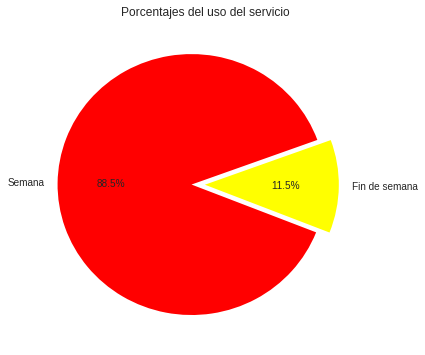

In [407]:
sizes = [dias_semana.start_day_of_week.count(), dias_finde.start_day_of_week.count()]
nombres = ['Semana', 'Fin de semana']

plt.figure(figsize=(6, 6))
plt.title('Porcentajes del uso del servicio')
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['red', 'yellow'], explode=(0.1, 0))
plt.show()

Se ve que hay una diferencia drástica en el uso del servicio entre la semana y el fin de semana.

### Promedio del uso del servicio por horario:

In [408]:
semana_entera = trips[['start_day_of_week','horario_inicial_float', 'start_station_name', 'end_station_name']].round()
semana_entera['horario_inicial_float'] = semana_entera['horario_inicial_float'].map(lambda x: x if x != 24 else 0)
# 24hs = 0hs
semana_entera.head()

,start_day_of_week,horario_inicial_float,start_station_name,end_station_name
4,Thursday,12.0,South Van Ness at Market,Market at 10th
6,Thursday,13.0,Santa Clara at Almaden,Adobe on Almaden
9,Thursday,11.0,San Jose City Hall,MLK Library
10,Thursday,14.0,Spear at Folsom,Embarcadero at Bryant
11,Thursday,13.0,San Pedro Square,Santa Clara at Almaden


In [409]:
semana = semana_entera[-(semana_entera['start_day_of_week'] == "Saturday")]
semana = semana_entera[-(semana_entera['start_day_of_week'] == "Sunday")]

In [410]:
semana['apariciones'] = semana['start_day_of_week'].map(lambda x: 1) # seteo todas las rows con 1 para despues agrupar
horarios_semana = semana[['horario_inicial_float', 'apariciones']]
semana = semana.drop('apariciones', 1) # vuelvo a dejar el dt como antes
horarios_semana_contador = horarios_semana.groupby('horario_inicial_float').aggregate(sum)

/home/rodrigo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


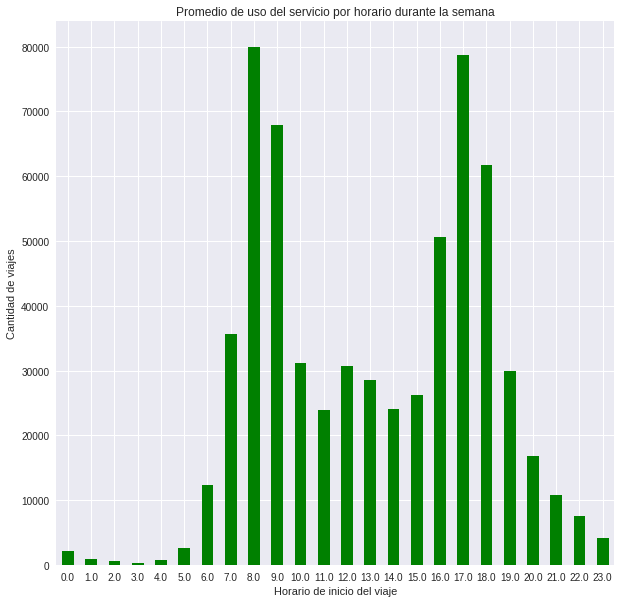

In [411]:
horarios_semana_contador.plot.bar(rot=0, figsize=(10,10), color='green');
plt.ylabel('Cantidad de viajes')
plt.xlabel('Horario de inicio del viaje')
plt.title('Promedio de uso del servicio por horario durante la semana')
plt.legend('')
plt.show()

Se aprecia que durante la semana los horarios pico son de 8 a 9 y de 18 a 19, particularmente cuando la gente va y cuando regresa al trabajo, escuela, etc.

In [412]:
finde = semana_entera[(semana_entera['start_day_of_week'] == "Saturday") | (semana_entera['start_day_of_week'] == "Sunday")]

In [413]:
finde['apariciones'] = finde['start_day_of_week'].map(lambda x: 1) # seteo todas las rows con 1 para despues agrupar
horarios_finde = finde[['horario_inicial_float', 'apariciones']]
finde = finde.drop('apariciones', 1) # vuelvo a dejar el dt como antes
horarios_finde_contador = horarios_finde.groupby('horario_inicial_float').aggregate(sum)

/home/rodrigo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


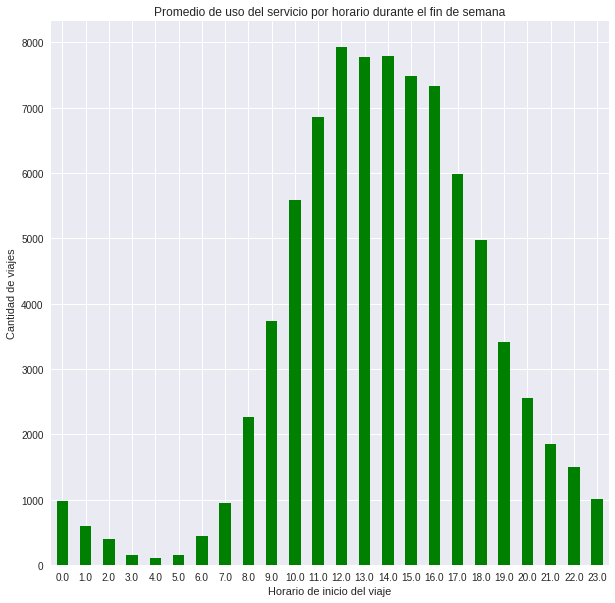

In [414]:
horarios_finde_contador.plot.bar(rot=0, figsize=(10,10), color='green');
plt.ylabel('Cantidad de viajes')
plt.xlabel('Horario de inicio del viaje')
plt.title('Promedio de uso del servicio por horario durante el fin de semana')
plt.legend('')
plt.show()

Los horarios pico los fines de semana son de 11 a 16. También lo que se observa es la disminución del uso del servicio al llegar la noche a pesar de que sea fin de semana. En el siguiente plot se va a analizar esa comparación.

In [415]:
viajes_en_hora_pico_finde = finde[((finde['horario_inicial_float'] >= 11) & (finde['horario_inicial_float'] <= 16))]
viajes_finde_noche = finde[((finde['horario_inicial_float'] >= 20) & (finde['horario_inicial_float'] < 24))]

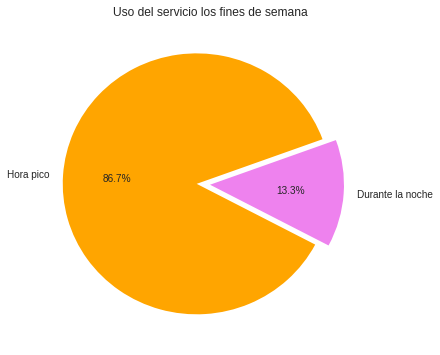

In [416]:
sizes = [viajes_en_hora_pico_finde.start_day_of_week.count(), viajes_finde_noche.start_day_of_week.count()]
nombres = ['Hora pico', 'Durante la noche']

plt.figure(figsize=(6, 6))
plt.title('Uso del servicio los fines de semana')
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['orange', 'violet'], explode=(0.1, 0))
plt.show()

## A) Análisis de los horarios importantes
### Se analizarán los destinos y trayectos más populares en los horarios críticos de la semana y fin de semana.

In [417]:
viajes_en_hora_pico_semana = semana[((semana['horario_inicial_float'] >= 8) & (semana['horario_inicial_float'] <= 9)) 
                                   | ((semana['horario_inicial_float'] >= 18) & (semana['horario_inicial_float'] <= 19))]

In [418]:
destinos_mas_populares_hora_pico_semana = viajes_en_hora_pico_semana['end_station_name'].value_counts().sort_values(ascending=False)
destinos_mas_populares_hora_pico_semana = destinos_mas_populares_hora_pico_semana.head(10)

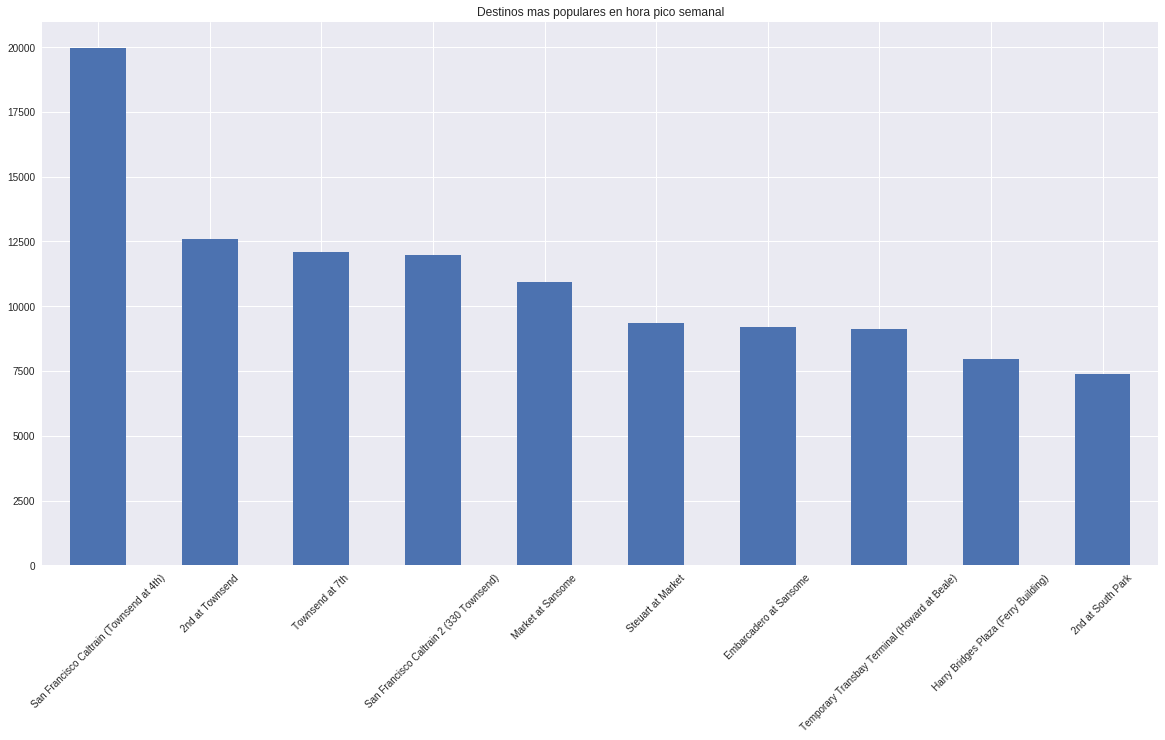

In [419]:
destinos_mas_populares_hora_pico_semana.plot(kind='bar', rot=45, figsize=(20,10));
plt.title('Destinos mas populares en hora pico semanal');

Estos son los 10 destinos más populares durante las horas pico en la semana. En primer lugar se destaca el Caltrain, donde una gran cantidad de gente se dirige luego de trabajar para regresar a sus casas. Las demás estaciones presentan áreas de mucho movimiento de gente: empresas, comercios, etc, y también se encuentra el puerto, por lo que lo más probable es que la gente se dirija allí para concurrir a trabajar.

In [420]:
# función que dado un dataframe con un campo 'start_station_name' y otro 'end_station_name',
# devuelve un diccionario con los start_station como clave y como valor un diccionario con clave el end_station
# y valor la cantidad de viajes de ese trayecto. También devuelve una lista con el trayecto con mayor cantidad
# de viajes junto con el start y end station del mismo. Orden = O(n) siendo n la cantidad de rows del dataframe.
def contador_viajes(dataframe):
    cont_viajes = {}
    viaje_mas_popular = []
    viaje_mas_popular.append(0)
    viaje_mas_popular.append("")
    viaje_mas_popular.append("")
    for index,row in dataframe.iterrows():
        
        if row['start_station_name'] not in cont_viajes:
            cont_viajes[row['start_station_name']] = {}
           
        if row['end_station_name'] not in cont_viajes[row['start_station_name']]:
            cont_viajes[row['start_station_name']][row['end_station_name']] = 1
        else:
            cont_viajes[row['start_station_name']][row['end_station_name']] += 1
        
        if cont_viajes[row['start_station_name']][row['end_station_name']] > viaje_mas_popular[0]:
            viaje_mas_popular[0] = cont_viajes[row['start_station_name']][row['end_station_name']]
            viaje_mas_popular[1] = row['start_station_name']
            viaje_mas_popular[2] = row['end_station_name']
    
    return cont_viajes,viaje_mas_popular

In [421]:
contador_de_viajes_hora_pico_semana,viaje_mas_popular_hora_pico_semana = contador_viajes(viajes_en_hora_pico_semana)
viaje_mas_popular_hora_pico_semana

[3012, 'San Francisco Caltrain 2 (330 Townsend)', 'Townsend at 7th']

Con esto se ve que el viaje más realizado en hora pico durante la semana es el trayecto San Francisco Caltrain 2 (330 Townsend) - Townsend at 7th.

In [422]:
destinos_mas_populares_hora_pico_finde = viajes_en_hora_pico_finde['end_station_name'].value_counts().sort_values(ascending=False)
destinos_mas_populares_hora_pico_finde = destinos_mas_populares_hora_pico_finde.head(10)

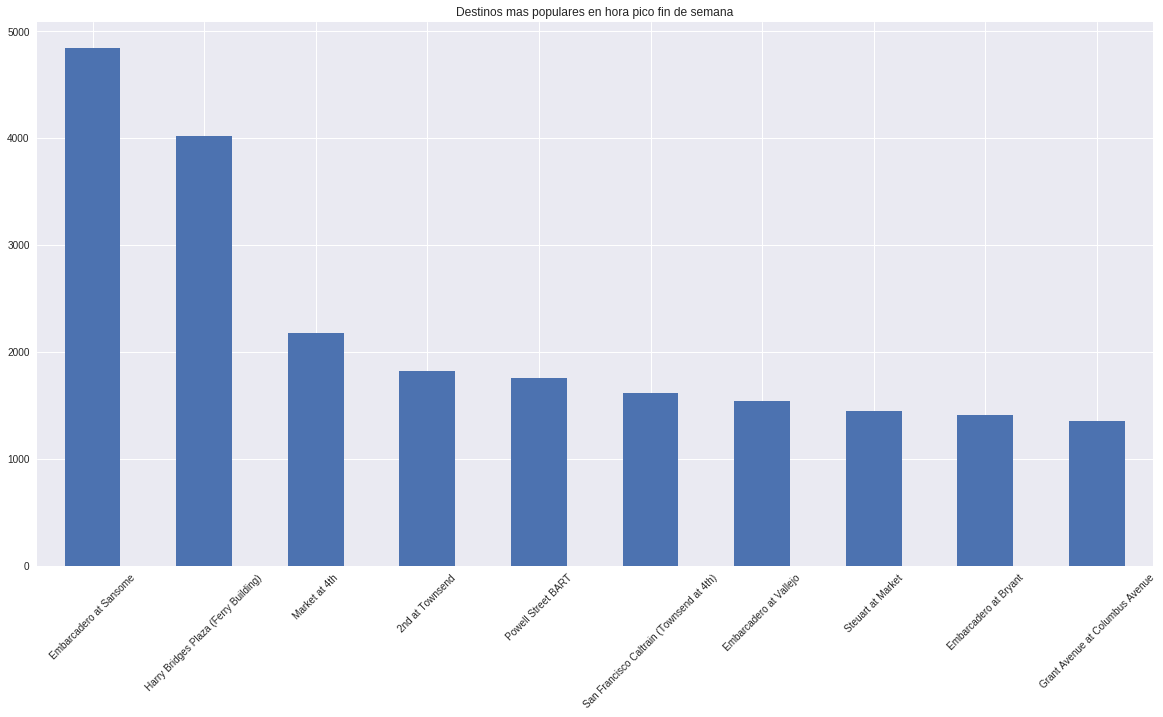

In [423]:
destinos_mas_populares_hora_pico_finde.plot(kind='bar', rot=45, figsize=(20,10));
plt.title('Destinos mas populares en hora pico fin de semana');

Aqui se encuentran los 10 destinos más populares para las horas pico del fin de semana. Se puede apreciar que los mismos se caracterizan por ser lugares muy atractivos para pasear y hacer actividades de ocio.

In [424]:
contador_de_viajes_hora_pico_finde,viaje_mas_popular_hora_pico_finde = contador_viajes(viajes_en_hora_pico_finde)
viaje_mas_popular_hora_pico_finde

[1068, 'Harry Bridges Plaza (Ferry Building)', 'Embarcadero at Sansome']

Con esto se ve que el viaje más realizado en hora pico durante el fin de semana es el trayecto Harry Bridges Plaza (Ferry Building) - Embarcadero at Sansome. Además estos dos son los destinos más concurridos las horas pico de los fines de semana. Un posible uso de esta información podría ser para fines comerciales, ya que esto da la pauta que por esta zona es donde más concentración de gente se encuentra. 

In [425]:
viernes_y_sab = semana_entera[(semana_entera['start_day_of_week'] == "Saturday") | (semana_entera['start_day_of_week'] == "Friday")]
viernes_y_sab_noche = viernes_y_sab[(viernes_y_sab['horario_inicial_float'] >= 20) & (viernes_y_sab['horario_inicial_float'] < 24)]

In [426]:
destinos_mas_populares_viernes_y_sab_noche = viernes_y_sab_noche['end_station_name'].value_counts().sort_values(ascending=False)
destinos_mas_populares_viernes_y_sab_noche = destinos_mas_populares_viernes_y_sab_noche.head(10)

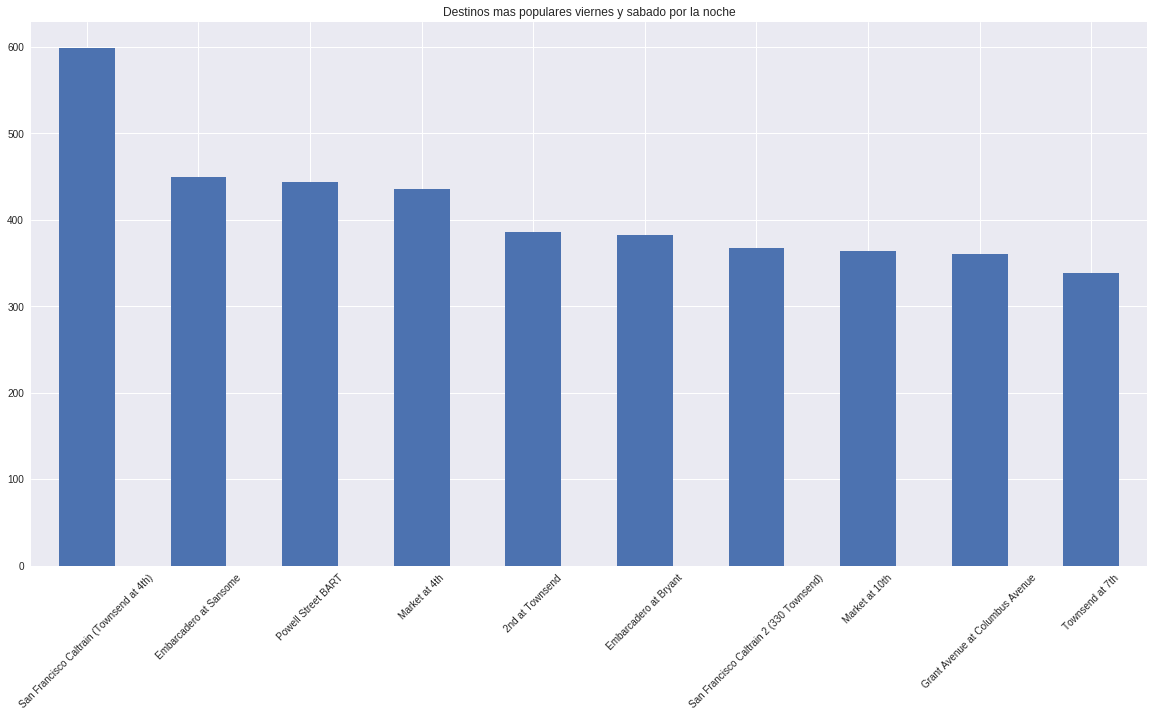

In [427]:
destinos_mas_populares_viernes_y_sab_noche.plot(kind='bar', rot=45, figsize=(20,10));
plt.title('Destinos mas populares viernes y sabado por la noche');

Estos son los destinos más frecuentados los viernes y sábados por la noche. Se analizó aparte del domingo ya que estos son los días que al día siguiente por lo general no se trabaja/concurre a estudiar, por lo que la gente se podría dormir más tarde y planear otro tipo de salida. Se destacan entre los lugares más frecuentados las estaciones Powell Street BART y Market at 4th, las cuales están rodeadas de shoppings, restaurantes y demás.

## B) Análisis relacionado a las duraciones de los viajes
### B.1) - ¿Viajes más largos en la semana o el fin de semana?

In [428]:
semana_entera_con_duracion = trips[['start_day_of_week','horario_inicial_float', 'start_station_name', 'end_station_name','duracion_viaje','duration']].round()
semana_entera_con_duracion.head()

,start_day_of_week,horario_inicial_float,start_station_name,end_station_name,duracion_viaje,duration
4,Thursday,12.0,South Van Ness at Market,Market at 10th,00:02:00,83
6,Thursday,13.0,Santa Clara at Almaden,Adobe on Almaden,00:02:00,109
9,Thursday,11.0,San Jose City Hall,MLK Library,00:02:00,114
10,Thursday,14.0,Spear at Folsom,Embarcadero at Bryant,00:03:00,125
11,Thursday,13.0,San Pedro Square,Santa Clara at Almaden,00:02:00,126


In [429]:
semana_con_duracion = semana_entera_con_duracion[-(semana_entera_con_duracion['start_day_of_week'] == "Saturday")]
semana_con_duracion = semana_entera_con_duracion[-(semana_entera_con_duracion['start_day_of_week'] == "Sunday")]

In [430]:
finde_con_duracion = semana_entera_con_duracion[(semana_entera_con_duracion['start_day_of_week'] == "Saturday") | (semana_entera_con_duracion['start_day_of_week'] == "Sunday")]

In [431]:
semana_con_duracion.duration.mean() / 60 # resultado en minutos

13.467938160917344

In [432]:
finde_con_duracion.duration.mean() / 60 # resultado en minutos

30.593984232967284

Los viajes en promedio duran más los fines de semana. Esto tiene lógica ya que los fines de semana la gente puede usar más tiempo para pasear con la bicileta sin tener un destino en particular cuando durante la semana la gente busca ir al trabajo o lugar donde ejercer sus obligaciones.
Igualmente hay que considerar que esta estadística podría estar dañada por muchos viajes "largos" en el fin de semana, por ejemplo de más de dos horas, que harían subir el promedio general, sin haber tantos viajes con un horario parecido al promedio calculado. A continuación se analizará eso:

In [433]:
semana_con_duracion[semana_con_duracion['duracion_viaje'] > "02:00:00"].start_day_of_week.count()

8250

In [434]:
finde_con_duracion[finde_con_duracion['duracion_viaje'] > "02:00:00"].start_day_of_week.count()

4886

Se observa que tanto en la semana como los fines de semana hay viajes de más de 2 horas, y que ya que la semana tiene más días que el fin de semana y la estadística muestra que son casi el doble de viajes, en promedio esos viajes largos se dan por igual todos los días, por lo que el probema de que haya viajes largos no afecta el resultado de la estadística anterior.

### B.2) - Trayectos interesantes
### A continuación se analizarán los trayectos más frecuentes según un criterio de duración y demás fitros.

In [435]:
finde_viajes_largos = finde_con_duracion[finde_con_duracion['duracion_viaje'] > "00:30:00"]

In [436]:
contador_de_viajes_largos_finde,viaje_largo_mas_popular_finde = contador_viajes(finde_viajes_largos)
viaje_largo_mas_popular_finde

[557,
 'Harry Bridges Plaza (Ferry Building)',
 'Harry Bridges Plaza (Ferry Building)']

Con esto se ve que los viajes mayores a 30 minutos los fines de semana son tanto de inicio como fin la estación Harry Bridges Plaza (Ferry Building). El objetivo de este análisis fue encontrar el trayecto más popular de los fines de semana que sea orientado a pasear (por eso el filtro de la duración). El resultado muestra que el viaje más realizado es empezar en dicha estación, recorrer por más de 30 minutos, y luego volver a esta misma dejar la bicicleta.

In [437]:
harry_harry = finde_viajes_largos[(finde_viajes_largos['start_station_name'] == 'Harry Bridges Plaza (Ferry Building)') & (finde_viajes_largos['end_station_name'] == 'Harry Bridges Plaza (Ferry Building)')]
harry_harry.describe()

,horario_inicial_float,duracion_viaje,duration
count,557.000000,557,557.000000
mean,13.199282,0 days 02:33:30.377019,9207.940754
std,3.028308,0 days 01:45:57.032306,6356.601234
min,5.000000,0 days 00:31:00,1811.000000
25%,11.000000,0 days 01:13:00,4364.000000
50%,13.000000,0 days 01:58:00,7122.000000
75%,15.000000,0 days 03:51:00,13818.000000
max,21.000000,0 days 07:56:00,28549.000000


Como se puede apreciar, estos viajes se caracterizan por su duración promedio de 2 horas y media y que en promedio salen a las 13hs. Esto da la pauta de qué elige la mayoría de gente a la hora de pasear por un largo rato aprovechando el clima de recién entrada la tarde.

In [438]:
semana_viajes_cortos = semana_con_duracion[(semana_con_duracion['duracion_viaje'] > "00:08:00") & (semana_con_duracion['duracion_viaje'] < "00:20:00")]

In [439]:
contador_de_viajes_cortos_semana,viaje_corto_mas_popular_semana = contador_viajes(semana_viajes_cortos)
viaje_corto_mas_popular_semana

[3247, 'Steuart at Market', 'San Francisco Caltrain (Townsend at 4th)']

In [440]:
steuart_caltrain = semana_viajes_cortos[(semana_viajes_cortos['start_station_name'] == 'Steuart at Market') & (semana_viajes_cortos['end_station_name'] == 'San Francisco Caltrain (Townsend at 4th)')]
steuart_caltrain.describe()

,horario_inicial_float,duracion_viaje,duration
count,3247.000000,3247,3247.000000
mean,14.825685,0 days 00:11:38.158299,697.412073
std,3.959800,0 days 00:01:58.426460,116.468743
min,0.000000,0 days 00:09:00,486.000000
25%,14.000000,0 days 00:10:00,615.000000
50%,16.000000,0 days 00:11:00,673.000000
75%,17.000000,0 days 00:13:00,757.000000
max,23.000000,0 days 00:19:00,1182.000000


Con esto se ve que el viaje entre 8 y 20 minutos más popular los días de semana es el trayecto Steuart at Market - San Francisco Caltrain (Townsend at 4th). El objetivo de este análisis fue encontrar el trayecto con una duración normal que más se haga considerando el tráfico que presenta un día semanal. Una posible conclusión debido a la hora promedio de comienzo de los viajes (15hs) es que la gente al terminar de trabajar se dirige desde Steuart at Market (un lugar con mucho movimiento por lo que deducimos que mucha gente trabaja por esa zona) en bicicleta hasta el Caltrain, y toma este transporte para volver a sus casas.

# 2) Análisis de la influencia de ciertas fechas en los viajes

A continuación se estudiará el comportamiento del servicio en fechas particulares. Para eso se hará un plot con los viajes a medida que transcurre el año. Se tomó el 2014 debido a que el 2015 sólo tiene datos hasta agosto.

In [441]:
# funciones para operar con un formato fecha (anio-mes-dia hora:minutos:segundos)
def obtener_dia(fecha):
    return fecha.day
def obtener_mes(fecha):
    return fecha.month
def fecha_sin_hora(fecha):
    return (str(fecha.year) + "-" + str(fecha.month) + "-" + str(fecha.day))

In [442]:
anio_2014 = trips[['start_date','start_day_of_week','horario_inicial_float', 'start_station_name', 'end_station_name','duracion_viaje', 'duration','subscription_type']].round()
anio_2014['horario_inicial_float'] = anio_2014['horario_inicial_float'].map(lambda x: x if x != 24 else 0)
anio_2014 = anio_2014[(anio_2014['start_date'].dt.year) == 2014]
anio_2014['fecha_sin_horario'] = anio_2014['start_date'].map(fecha_sin_hora)
anio_2014['fecha_sin_horario'] = pd.to_datetime(anio_2014['fecha_sin_horario'])
anio_2014['dia'] = anio_2014['start_date'].map(obtener_dia)
anio_2014['mes'] = anio_2014['start_date'].map(obtener_mes)
anio_2014 = anio_2014.sort_values(by='start_date')
anio_2014.head()

,start_date,start_day_of_week,horario_inicial_float,start_station_name,end_station_name,duracion_viaje,duration,subscription_type,fecha_sin_horario,dia,mes
100563,2014-01-01 00:14:00,Wednesday,0.0,San Francisco City Hall,Townsend at 7th,00:07:00,435,Subscriber,2014-01-01,1,1
100564,2014-01-01 00:14:00,Wednesday,0.0,San Francisco City Hall,Townsend at 7th,00:07:00,432,Subscriber,2014-01-01,1,1
100565,2014-01-01 00:17:00,Wednesday,0.0,Embarcadero at Sansome,Beale at Market,00:25:00,1523,Subscriber,2014-01-01,1,1
100566,2014-01-01 00:23:00,Wednesday,0.0,Steuart at Market,Powell Street BART,00:27:00,1620,Customer,2014-01-01,1,1
100567,2014-01-01 00:23:00,Wednesday,0.0,Steuart at Market,Powell Street BART,00:27:00,1617,Customer,2014-01-01,1,1


In [443]:
anio_2014['viaje'] = anio_2014['start_day_of_week'].map(lambda x: 1) # seteo todas las rows con 1 para despues agrupar
viajes_segun_dia = anio_2014[['fecha_sin_horario', 'viaje']]
anio_2014 = anio_2014.drop('viaje', 1) # vuelvo a dejar el dt como antes
viajes_segun_dia_contador = viajes_segun_dia.groupby('fecha_sin_horario').aggregate(sum)
viajes_segun_dia_contador.head()

,viaje
fecha_sin_horario,
2014-01-01,350
2014-01-02,760
2014-01-03,774
2014-01-04,354
2014-01-05,293


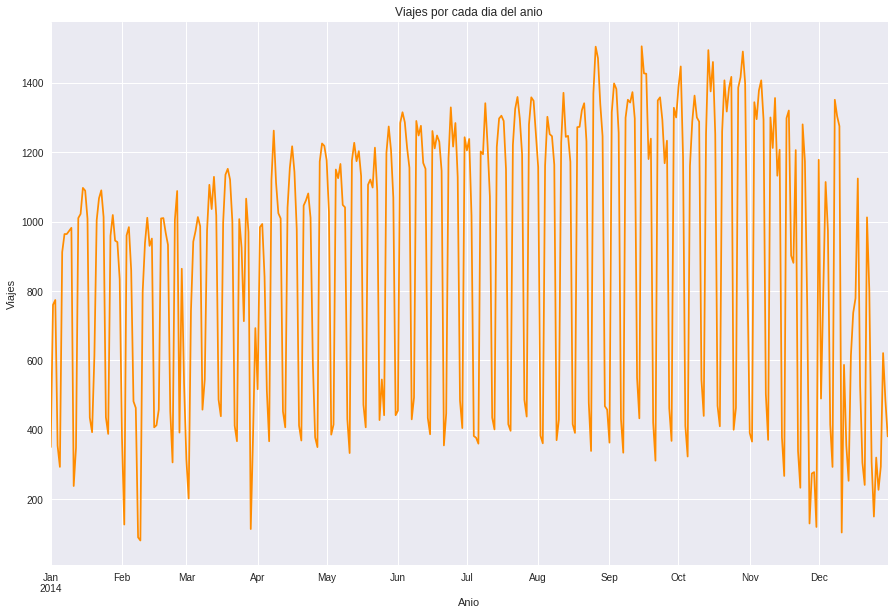

In [444]:
viajes_segun_dia_contador.plot.line(figsize=(15,10), color='darkorange');
plt.xlabel('Anio')
plt.ylabel('Viajes')
plt.title('Viajes por cada dia del anio')
plt.grid(True)
plt.legend('');
plt.show()

En primer lugar se pueden observar picos en fechas como Halloween (fines octubre) y Homecoming (principios octubre). Luego se puede notar como decae el uso del servicio en feriados como por ejemplo en día de acción de gracias (fines noviembre), navidad, semana santa (fines marzo) y demás. También otra observación es la diferencia de viajes que se hacen en inviero en comparación al resto del año. 

In [445]:
viajes_segun_dia_contador[viajes_segun_dia_contador['viaje'] > 1400]

,viaje
fecha_sin_horario,
2014-08-26,1504
2014-08-27,1471
2014-09-15,1505
2014-09-16,1427
2014-09-17,1426
2014-10-02,1447
2014-10-14,1494
2014-10-16,1460
2014-10-21,1407


In [446]:
viajes_segun_dia_contador[viajes_segun_dia_contador['viaje'] < 200]

,viaje
fecha_sin_horario,
2014-02-02,127
2014-02-08,90
2014-02-09,81
2014-03-29,114
2014-11-27,130
2014-11-30,120
2014-12-11,104
2014-12-25,150


## ¿Los días con picos de viajes atraen a clientes no suscriptos al servicio?
Se analizará cuánta gente no suscripta usa el servicio en días festivos como Halloween.

In [447]:
halloween = anio_2014[anio_2014['fecha_sin_horario'] == "2014-10-29"].subscription_type.value_counts()

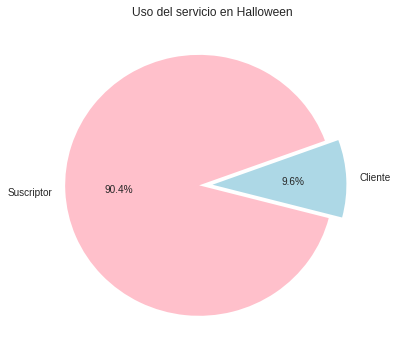

In [448]:
sizes = [haloween.Subscriber, haloween.Customer]
nombres = ['Suscriptor', 'Cliente']

plt.figure(figsize=(6, 6))
plt.title('Uso del servicio en Halloween')
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['pink', 'lightblue'], explode=(0.1, 0))
plt.show()

En una primera instancia el valor es bajo a pesar de ser Halloween. Ahora se va a buscar como es normalmente la relación Suscriptor-Cliente en porcentajes y también la diferencia en cantidad de viajes para comparar. Tomamos el promedio de un mes el cual se mantenga estable, sin picos, como por ejemplo junio.

In [449]:
junio = anio_2014[anio_2014['mes'] == 6]
suscripciones_junio = junio.subscription_type.value_counts()
dia_promedio_junio = suscripciones_junio / 30

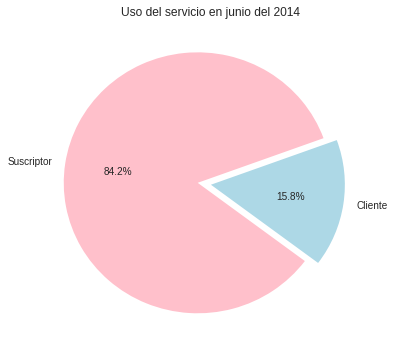

In [450]:
sizes = [dia_promedio_junio.Subscriber, dia_promedio_junio.Customer]
nombres = ['Suscriptor', 'Cliente']

plt.figure(figsize=(6, 6))
plt.title('Uso del servicio en junio del 2014')
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['pink', 'lightblue'], explode=(0.1, 0))
plt.show()

In [451]:
halloween

Subscriber    1347
Customer       143
Name: subscription_type, dtype: int64

In [452]:
dia_promedio_junio

Subscriber    835.233333
Customer      156.600000
Name: subscription_type, dtype: float64

Se ve que en promedio los días comunes tienen un mayor porcentaje de clientes. Y tampoco influye que en Halloween sean más viajes ya que el aumento sólo se nota en suscriptores y no en clientes. Al contrario de lo que uno esperaría, en Halloween la gente no suscripta al servicio no lo toma en cuenta como una opción.

In [453]:
# estadisticas años:
# año con mas viajes (crece ascendentemente el servicio?)

In [454]:
# cuántas bicicletas hay disponibles para alquilar (está en el finger 1)